In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

/tmp/ipykernel_735/3446780225.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  BT = nc_fid.variables["data"][:]  # shape lat, lon as shown above


/tmp/ipykernel_735/3446780225.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lats = nc_fid.variables['lat'][:]  # extract/copy the data


/tmp/ipykernel_735/3446780225.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lons = nc_fid.variables['lon'][:]


BT =  [[143. 143. 143. ... 143. 143. 143.]
 [143. 143. 143. ... 143. 143. 143.]
 [143. 144. 143. ... 143. 143. 143.]
 ...
 [178. 178. 178. ... 182. 181. 178.]
 [178. 178. 178. ... 182. 181. 178.]
 [178. 178. 178. ... 182. 181. 178.]] (3000, 4999)
BT mean =  124.91659
BT max = 255.0
BT min = 0.0
       0      1      2      3      4      5      6      7      8      9     \
0     143.0  143.0  143.0  143.0  144.0  144.0  145.0  145.0  145.0  144.0   
1     143.0  143.0  143.0  143.0  144.0  144.0  145.0  145.0  145.0  144.0   
2     143.0  144.0  143.0  144.0  144.0  144.0  144.0  144.0  141.0  141.0   
3     143.0  144.0  143.0  144.0  144.0  144.0  144.0  144.0  141.0  141.0   
4     143.0  144.0  143.0  144.0  144.0  144.0  144.0  144.0  141.0  141.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2995  178.0  178.0  178.0  179.0  179.0  179.0  179.0  179.0  178.0  178.0   
2996  178.0  178.0  178.0  179.0  179.0  179.0  179.0  179.0  178.0  178.0   
29

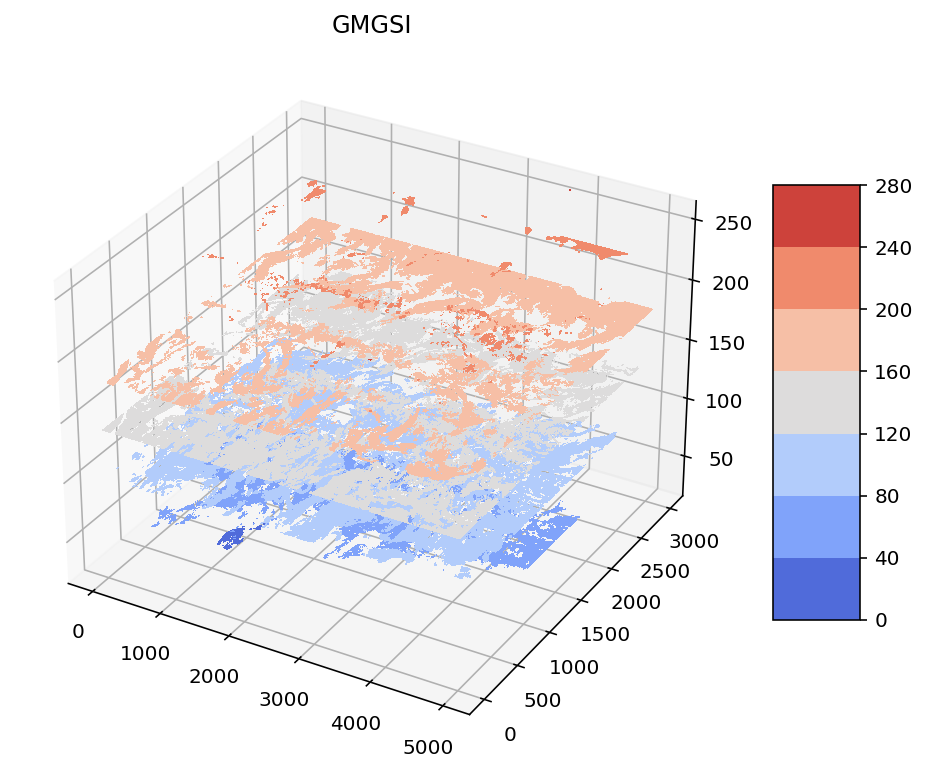

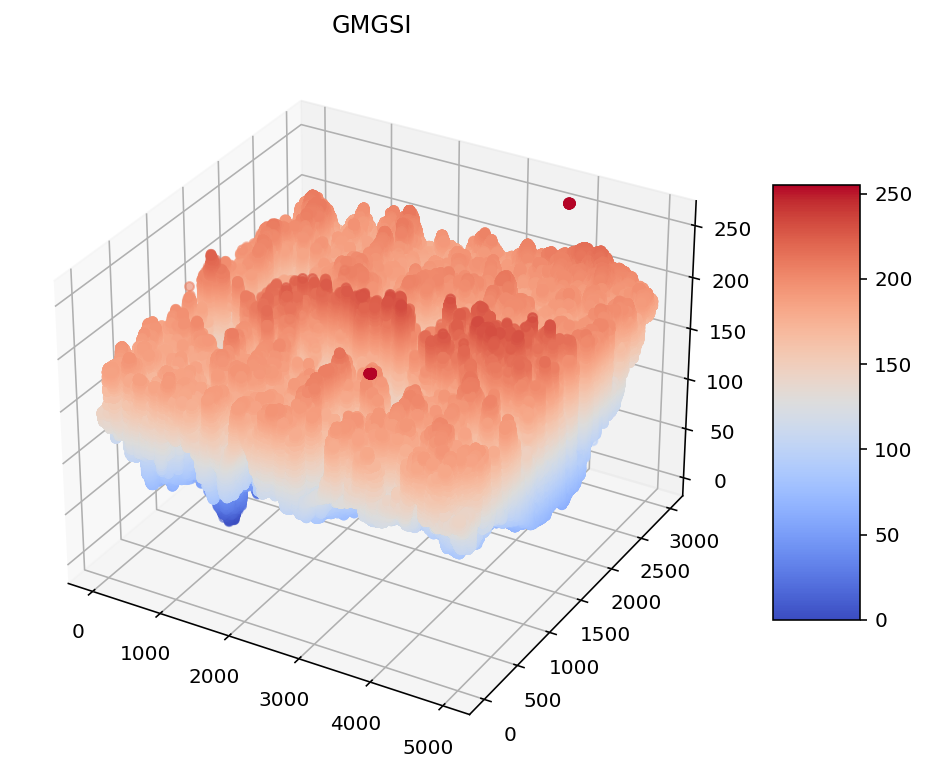

In [2]:
def read_GMGSI(ncf):
    nc_fid = Dataset(ncf, 'r')
    BT = nc_fid.variables["data"][:]  # shape lat, lon as shown above
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return BT, lats, lons, names

GMGSI_file = 'GLOBCOMPLIR_nc.2022062720.nc'
BT, lats1, lons1, names = read_GMGSI(GMGSI_file)
BT = BT[0,:,:]
print("BT = ", BT, BT.shape)
BT_mn = np.mean(BT)
print("BT mean = ", BT_mn)
BT_max = np.amax(BT)
BT_min = np.amin(BT)
print("BT max =", BT_max)
print("BT min =", BT_min)
BT_df = pd.DataFrame(BT)
print(BT_df)
dfidx = BT_df.index.values
print("Index:", dfidx)
dfcol = BT_df.columns.values
print("Columns:", dfcol)
BT_null = BT_df.isnull()
print("Null Values: ")
print(BT_null)
inds = np.asarray(BT_df.isnull()).nonzero()
print("Null Values: ", inds)
print(inds[0].shape,inds[1].shape)
X, Y = np.meshgrid(dfcol,dfidx)
print(X, Y)
Z = BT_df.values
print("BT:", Z, type(Z)) 

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('GMGSI')
# Plot a 3D surface
BT_surf = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(BT_surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('GMGSI')
# Plot a 3D scatter plot
BT_scatter = ax.scatter(X, Y, Z, c=Z, cmap=cm.coolwarm)
fig.colorbar(BT_scatter, ax=ax, shrink=0.5, aspect=5)
plt.show()